**Get data set from kaggle using API**

---



In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amadeuzz","key":"04cd047f009bbfbe7aeaa768b02ce818"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 20% 5.00M/25.0M [00:00<00:03, 5.42MB/s]
100% 25.0M/25.0M [00:01<00:00, 25.0MB/s]


In [6]:
! unzip anime-recommendations-database.zip

Archive:  anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


**Import modules**

---



In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 

import numpy as np 

import random
from random import randint

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 


Get to know the dataset



In [8]:
df_anime = pd.read_csv('anime.csv')
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Clean null data using method .dropna()

In [11]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
df_anime = df_anime.dropna()
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [13]:
df_rate = pd.read_csv('rating.csv')
df_rate.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [14]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [15]:
df_rate.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [16]:
df_rate.shape

(7813737, 3)

###Clean rating -1

In [17]:
df_rate = df_rate.drop(df_rate[df_rate.rating == -1].index)
print (df_rate.head())


     user_id  anime_id  rating
47         1      8074      10
81         1     11617      10
83         1     11757      10
101        1     15451      10
153        2     11771      10


In [18]:
df_anime = df_anime.rename(columns={'rating': 'avg_rating'})
df_anime.head()

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [19]:
df_rate = df_rate.rename(columns={'rating': 'user_rating'})
df_rate.head()

,user_id,anime_id,user_rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [20]:
df = pd.merge(df_anime, df_rate, on='anime_id')
df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


In [21]:
df.shape

(6337146, 9)

In [22]:
df.drop(df[df['user_rating'] < 1].index, inplace=True)
len(df['user_rating'])

6337146

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337146 entries, 0 to 6337145
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   avg_rating   float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 612.5+ MB


In [24]:
df.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
avg_rating     0
members        0
user_id        0
user_rating    0
dtype: int64

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,6337146.0,8902.548389,8881.673904,1.0,1239.00,6213.0,14075.00,34475.00
avg_rating,6337146.0,7.675013,0.669906,2.0,7.29,7.7,8.15,9.37
members,6337146.0,184576.846814,190953.412232,33.0,46803.00,117091.0,256325.00,1013917.00
user_id,6337146.0,36747.953454,21013.370972,1.0,18985.00,36815.0,54873.00,73516.00
user_rating,6337146.0,7.808543,1.572440,1.0,7.00,8.0,9.00,10.00


#**Exploratory data analysis (EDA)**

In [26]:
# avg number of anime rated per user
import statistics
ratings_per_user = df.groupby('user_id')['user_rating'].count()
statistics.mean(ratings_per_user.tolist())

91.05094827586207

###**distribution of ratings per user**



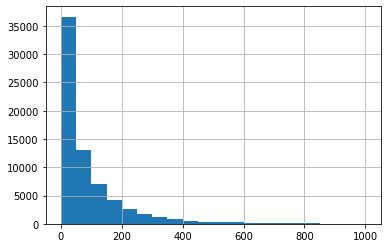

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=20, range=(0,1000))


The majority of users have rated less than 200 anime.

In [28]:
import seaborn as sns
merge_rating = df.dropna(axis = 0, subset = ['name'])
anime_ratingCount = (merge_rating.
     groupby(['name','user_rating']).
     size().
     reset_index(name='totalRatingCount')
    )
anime_ratingCount.head()

,name,user_rating,totalRatingCount
0,&quot;0&quot;,1,1
1,&quot;0&quot;,2,2
2,&quot;0&quot;,4,1
3,&quot;0&quot;,5,8
4,&quot;0&quot;,6,3


In [29]:
rating_with_totalRatingCount = merge_rating.merge(anime_ratingCount, left_on = 'name', right_on = 'name', how = 'left')
rating_with_totalRatingCount.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating_x,user_rating_y,totalRatingCount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2,1
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,4,1
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,5,4
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,6,16
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,7,49


In [30]:
print("Number of types of different anime:", df.type.nunique())
print("Types ", df.type.value_counts())

Number of types of different anime: 6
Types  TV         4364294
Movie       842078
OVA         617166
Special     421618
ONA          72119
Music        19871
Name: type, dtype: int64


Text(0, 0.5, 'User Rating count')

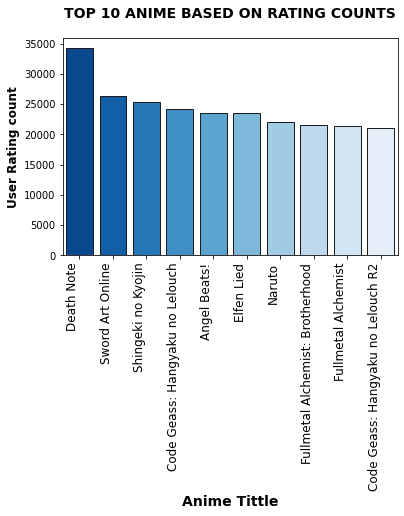

In [31]:
# Creating a dataframe for rating counts
combine_anime_rating = df.dropna(axis = 0, subset = ['name'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['name'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['name', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_animerating=anime_ratingCount[['name', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="name", y="user_rating", data=top10_animerating, palette='Blues_r', saturation=1, edgecolor = "#1c1c1c")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=90, ha="right")
ax.set_title('TOP 10 ANIME BASED ON RATING COUNTS',fontsize = 14, weight='bold', pad=20)
ax.set_xlabel('Anime Tittle',fontsize = 14, weight='bold') 
ax.set_ylabel('User Rating count', fontsize = 12, weight='bold')

###**TOP 10 ANIME WITH THE HIGHEST MEMBER BASE** 

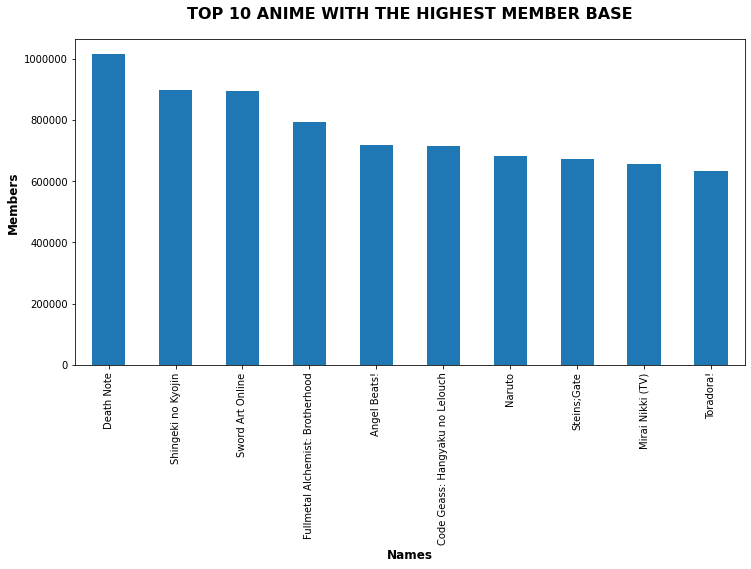

In [32]:
df.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'].plot(kind='bar',figsize=(12,6)) 
plt.xlabel('Names', fontsize = 12,  weight='bold')
plt.ylabel('Members', fontsize = 12,  weight='bold')
plt.title('TOP 10 ANIME WITH THE HIGHEST MEMBER BASE', weight='bold', pad=20, fontsize = 16)
plt.ticklabel_format(style='plain', axis='y')

'Death Note' has the most community members, followed by 'Shingeki no Kyojin' and 'Sword Art Online.'

In [33]:
df.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [34]:
print("Number of types of different anime:", df.type.nunique())
print("Types: ", df.type.value_counts())

Number of types of different anime: 6
Types:  TV         4364294
Movie       842078
OVA         617166
Special     421618
ONA          72119
Music        19871
Name: type, dtype: int64


##**MOST VIEWED ANIME TYPES**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


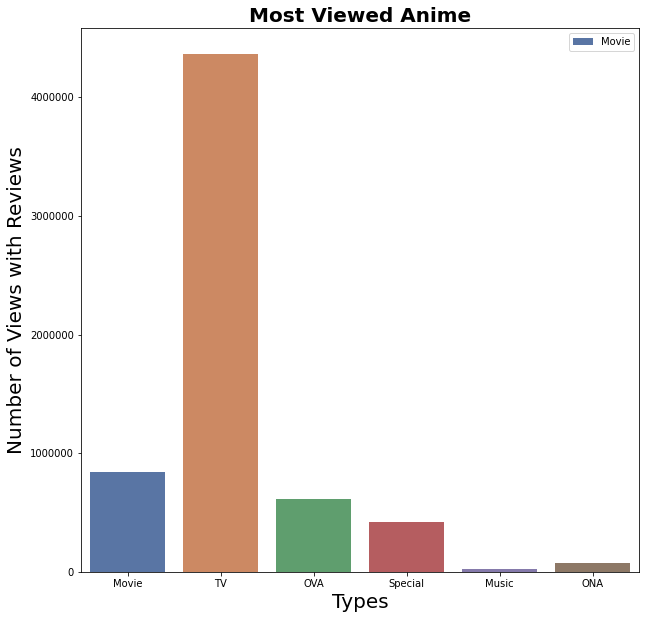

In [35]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df['type'], palette='deep')
plt.title("Most Viewed Anime", fontsize=20, weight='bold')
plt.xlabel("Types", fontsize=20)
plt.ylabel("Number of Views with Reviews", fontsize = 20)
plt.legend(df['type'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()


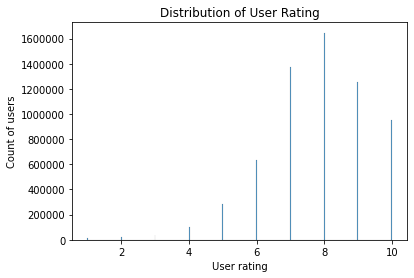

In [36]:
sns.histplot(df, x="user_rating")
plt.xlabel("User rating")
plt.ylabel("Count of users")
plt.title("Distribution of User Rating")
plt.ticklabel_format(style='plain') 
plt.show()

* Most of the Anime ratings are spread between 6.0 - 9.0
* The mode of the users ratings distribution is around 7.0 - 8.0

#**Modelling**

##KNN 

---



The recommendation system tries to get a rating for an anime in this project. It uses collaborative filtering system algorithm such as
KNNto make an accurate recommendation to the users.
* Collaborative Filtering
Based on past behavior, this approach builds a model of the user. Users may have watched videos, purchased items, or given ratings on items in the past. Using this model, the model can predict the item or a rating for the item that a user might be interested in based on an association between the user and the item.KNN is used as a collaborative filtering approach in recommender systems.
    * KNN
Collaborative filtering systems use the actions of users to recommend other most liked anime to the users. User-based approaches
and item-based approaches can both be used. However, item-based approaches are usually preferred. Users are often more difficult to scale due to their dynamic nature, whereas items usually don't change too much and can be computed offline and served without constantly retraining. KNN can be used to develop a collaborative filtering system based on items in order to make inferences about
new samples; it uses a database in which data points are grouped into several clusters.


In [37]:
anime_pivot=df[:100000].pivot_table(index='name',columns='user_id',values='user_rating').fillna(0)


In [55]:
from scipy.sparse import csr_matrix

matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_cf = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_cf.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [56]:
distances, indices = model_cf.kneighbors(anime_pivot.iloc[11,:].values.reshape(1, -1), n_neighbors = 6)

  * Working of KNN
Based on item feature similarity, KNN makes no assumptions about the distribution of the underlying data. As shown below, it
calculates the "distance" between the target most rated anime and every other anime in the database, then ranks their distances and
returns the most liked anime's as recommendations.

In [40]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[11]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Hunter x Hunter (2011):

1: Fullmetal Alchemist: Brotherhood, with distance of 0.582916050148331:
2: Steins;Gate, with distance of 0.6247773379089085:
3: Code Geass: Hangyaku no Lelouch R2, with distance of 0.6543877255375563:
4: Gintama, with distance of 0.7415196494555457:
5: Gintama&#039;, with distance of 0.7433903262344277:


In [41]:
df.shape

(6337146, 9)

##Content Based

---



The content-based filtering uses the features of the items and a user’s profile created
from the data of previous activities to generate recommendations. This technique is
most appropriate when known information about the items (name, area, portrayal). In
content-based recommender system, recommendations are treated as a user-specific
classification problem where the classifier is trained based on the likes and dislikes of
the user and item features. Items are described using keywords, and a client profile is
created to store the kind of items the client likes. These algorithms use this user profile
to recommend items similar to those the client is currently examining or enjoyed in
the past.


In [42]:
df = df.sample(frac=1, random_state=42)
df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
2393662,11111,Another,"Horror, Mystery, School, Supernatural, Thriller",TV,12,7.88,534657,6387,8
490859,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,4204,6
2730967,3713,Jigoku Shoujo Mitsuganae,"Mystery, Psychological, Supernatural",TV,26,7.81,58993,8307,10
4567340,21881,Sword Art Online II,"Action, Adventure, Fantasy, Game, Romance",TV,24,7.35,537892,71448,6
2250913,6154,Saint Seiya: The Hades Chapter Sanctuary - Yom...,"Adventure, Sci-Fi, Shounen",Special,2,7.93,4975,3436,8


In [43]:
df.shape

(6337146, 9)

In [44]:
df_sample = df[:5000]
df_sample.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
2393662,11111,Another,"Horror, Mystery, School, Supernatural, Thriller",TV,12,7.88,534657,6387,8
490859,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,4204,6
2730967,3713,Jigoku Shoujo Mitsuganae,"Mystery, Psychological, Supernatural",TV,26,7.81,58993,8307,10
4567340,21881,Sword Art Online II,"Action, Adventure, Fantasy, Game, Romance",TV,24,7.35,537892,71448,6
2250913,6154,Saint Seiya: The Hades Chapter Sanctuary - Yom...,"Adventure, Sci-Fi, Shounen",Special,2,7.93,4975,3436,8


In [45]:
df_sample.shape

(5000, 9)

In [46]:
df_sample = df_sample.drop_duplicates('anime_id')

* TfidfVectorizer initialization
* count idf to genre 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
 

tf = TfidfVectorizer()

tf.fit(df_sample['genre']) 

tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

* fit transform to matrix

In [48]:

tfidf_matrix = tf.fit_transform(df_sample['genre']) 

tfidf_matrix.shape 

(1972, 47)

* change vektor tf-idf  into matrix using todense() method



In [49]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29205341, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.40471231, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

* Make dataframe to tf-idf matrix




In [50]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df_sample.name
).sample(22, axis=1).sample(10, axis=0)

,ecchi,vampire,arts,mystery,magic,of,music,shounen,action,hentai,...,romance,cars,historical,supernatural,adventure,mecha,life,parody,harem,samurai
name,,,,,,,,,,,,,,,,,,,,,
Aa! Megami-sama!: Sorezore no Tsubasa Specials,0.0,0.0,0.000000,0.000000,0.552343,0.000000,0.0,0.00000,0.000000,0.0,...,0.364595,0.0,0.000000,0.425226,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Detective Conan OVA 04: Conan and Kid and Crystal Mother,0.0,0.0,0.000000,0.488144,0.000000,0.000000,0.0,0.35112,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.367501,0.0,0.000000,0.000000,0.000000,0.000000
Ouran Koukou Host Club,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.360733,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.554958,0.000000
Tokyo Ghoul √A,0.0,0.0,0.000000,0.403422,0.000000,0.000000,0.0,0.00000,0.237548,0.0,...,0.000000,0.0,0.000000,0.312651,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen,0.0,0.0,0.451954,0.000000,0.000000,0.000000,0.0,0.00000,0.208191,0.0,...,0.234942,0.0,0.401664,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.519499
Black Lagoon Omake,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Mangirl!,0.0,0.0,0.000000,0.000000,0.000000,0.548487,0.0,0.00000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.548487,0.000000,0.000000,0.000000
Darker than Black: Kuro no Keiyakusha Special,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.729699,0.000000,0.000000
Amagi Brilliant Park,0.0,0.0,0.000000,0.000000,0.894641,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000




*   Makes dataframe of variable cosine_sim with rows and columns anime's name
*   count cosine similarity in matrix tf-idf




In [51]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.40153689, ..., 0.        , 0.29409789,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.29457415,
        0.34850706],
       [0.40153689, 0.        , 1.        , ..., 0.        , 0.40295265,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.08570291,
        0.        ],
       [0.29409789, 0.29457415, 0.40295265, ..., 0.08570291, 1.        ,
        0.        ],
       [0.        , 0.34850706, 0.        , ..., 0.        , 0.        ,
        1.        ]])

* matrix similarity at every anime's name

In [52]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_sample['name'], columns=df_sample['name'])
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(20, axis=1).sample(20, axis=0)

Shape: (1972, 1972)


name,Wonderful Days,Digimon Adventure,Shingeki! Kyojin Chuugakkou,Kuusen Madoushi Kouhosei no Kyoukan,Cuticle Tantei Inaba,Pokemon Best Wishes!,R.O.D the TV,Mahou Shoujo Nante Mou Ii Desukara.,Princess Lover! OVA,Gundam Build Fighters Try,Darker than Black: Ryuusei no Gemini,Tonari no Seki-kun OVA,I&#039;&#039;s Pure,Ookamikakushi,Rokujouma no Shinryakusha!? (TV),Owari no Seraph: Nagoya Kessen-hen,Tokyo Magnitude 8.0,Toshokan Sensou: Kakumei no Tsubasa,Koi Kaze,Tsukuyomi: Moon Phase
name,,,,,,,,,,,,,,,,,,,,
Evangelion: 1.0 You Are (Not) Alone,0.589302,0.113063,0.000000,0.128256,0.133631,0.113063,0.407833,0.000000,0.0,1.000000,0.421448,0.000000,0.000000,0.120743,0.000000,0.111133,0.000000,0.146214,0.000000,0.000000
Mesu Kyoushi: Injoku no Kyoushitsu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Shuffle!,0.244224,0.158571,0.197090,0.608053,0.061507,0.158571,0.134898,0.451410,0.0,0.000000,0.000000,0.544904,0.649889,0.000000,0.544338,0.099924,0.281885,0.184874,0.433143,0.435786
Kirepapa.,0.284038,0.060524,0.069671,0.134119,0.071534,0.060524,0.156889,0.104799,0.0,0.000000,0.000000,0.086818,0.342163,0.000000,0.189612,0.116213,0.327839,0.215012,0.241780,0.158147
Juubee Ninpuuchou,0.124660,0.241355,0.132586,0.130656,0.294164,0.241355,0.110742,0.000000,0.0,0.000000,0.000000,0.000000,0.118223,0.471157,0.264587,0.244639,0.000000,0.127119,0.106114,0.203056
Hentai Ouji to Warawanai Neko.: Henneko BBS,0.000000,0.258029,0.297027,0.000000,0.304970,0.258029,0.226466,0.446786,0.0,0.000000,0.000000,0.370127,0.310335,0.000000,0.294267,0.000000,0.000000,0.333688,0.000000,0.245435
Kimi ga Nozomu Eien,0.336391,0.000000,0.000000,0.158839,0.000000,0.000000,0.122895,0.000000,0.0,0.000000,0.000000,0.000000,0.319019,0.000000,0.142814,0.137633,0.388264,0.161946,0.286344,0.119115
Code Geass: Hangyaku no Lelouch,0.364519,0.069936,0.134389,0.211767,0.082659,0.069936,0.639929,0.000000,0.0,0.618562,0.661292,0.167463,0.140410,0.074687,0.133140,0.068743,0.000000,0.410984,0.000000,0.000000
Hoshi wo Katta Hi,0.392916,0.606983,0.000000,0.000000,0.000000,0.606983,0.271922,0.000000,0.0,0.383518,0.281000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* Taking data with the largest index similarity


In [53]:
def anime_recommendations(name, similarity_data=cosine_sim_df, items=df_sample[['name', 'genre']], k=5):
  index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))
    

  closest = similarity_data.columns[index[-1:-(k+2):-1]]


  closest = closest.drop(name, errors='ignore')
 
  return pd.DataFrame(closest).merge(items).head(k)
    

In [54]:
anime_recommendations('Hunter x Hunter (2011)')

,name,genre
0,Hunter x Hunter Movie: Phantom Rouge,"Action, Adventure, Shounen, Super Power"
1,Hunter x Hunter Movie: The Last Mission,"Action, Adventure, Shounen, Super Power"
2,Hunter x Hunter: Greed Island,"Action, Adventure, Shounen, Super Power"
3,Hunter x Hunter,"Action, Adventure, Shounen, Super Power"
4,Hunter x Hunter OVA,"Action, Adventure, Shounen, Super Power"
